# Case Study 3 : Textual analysis of movie reviews

** Due Date: November 17, 2016 5:59PM**

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    member 1
    
    member 2
    
    ...

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Enthought Canopy)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code:
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [1]:
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pylab as py
import matplotlib.pyplot as plt
import scipy
from IPython.display import HTML
from datetime import datetime
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
lastRunTime = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
import re
%matplotlib inline

** download the data (if not avaliable locally ) and load it into dataset**

In [2]:
"""Script to download the movie review dataset"""
# copied from doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
import os
import tarfile
from contextlib import closing
try:
    from urllib import urlopen
except ImportError:
    from urllib.request import urlopen


URL = ("http://www.cs.cornell.edu/people/pabo/"
       "movie-review-data/review_polarity.tar.gz")

ARCHIVE_NAME = URL.rsplit('/', 1)[1]
DATA_FOLDER = "txt_sentoken"


if not os.path.exists(DATA_FOLDER):

    if not os.path.exists(ARCHIVE_NAME):
        print("Downloading dataset from %s (3 MB)" % URL)
        opener = urlopen(URL)
        with open(ARCHIVE_NAME, 'wb') as archive:
            archive.write(opener.read())

    print("Decompressing %s" % ARCHIVE_NAME)
    with closing(tarfile.open(ARCHIVE_NAME, "r:gz")) as archive:
        archive.extractall(path='.')
    os.remove(ARCHIVE_NAME)
    
dataset = load_files(DATA_FOLDER, shuffle=False)
print("n_samples: %d" % len(dataset.data))

print("Done: " + lastRunTime)

n_samples: 2000
Done: 2016-11-17 06:52:27


** Build the text classification pipeline **

In [3]:
# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)

# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
    ('clf', LinearSVC(C=1000)),
])

# TASK: Build a grid search to find out whether unigrams or bigrams are
# more useful.
# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=1)
grid_search.fit(docs_train, y_train)

# TASK: print the mean and std for each candidate along with the parameter
# settings for all the candidates explored by grid search.
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))
    
# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)

print("Done: " + lastRunTime)

0 params - {'vect__ngram_range': (1, 1)}; mean - 0.84; std - 0.01
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.87; std - 0.01
Done: 2016-11-13 20:05:45


** Print the classification report and the confusion matrix **

**Classification Report**

             precision    recall  f1-score   support

        neg       0.84      0.83      0.84       249
        pos       0.83      0.85      0.84       251

avg / total       0.84      0.84      0.84       500

**Confusion Matrix**

[[206  43]
 [ 38 213]]


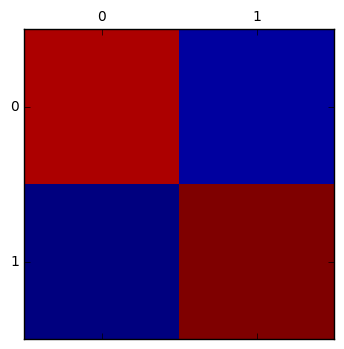

Done: 2016-11-13 20:05:45


In [4]:
# Print the classification report
print("**Classification Report**\n")
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
print("**Confusion Matrix**\n")
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

plt.matshow(cm)
plt.show()

print("Done: " + lastRunTime)

## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

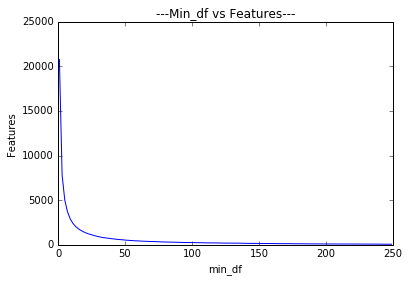

In [148]:
#lets examine how min_df affect the number of featuers.
# as the paramter accept percentage and absoulte value, we will try the aboulate, we don't expect any change
# in the trend if we using the absoulte or percentage though.
x_range=np.arange(1,250,2)

values=[TfidfVectorizer(max_df=500,min_df=i).fit(dataset.data[:500]).idf_.shape[0] for i in x_range]

plt.plot(x_range,values)
plt.title('---Min_df vs Features---')
plt.ylabel('Features')
plt.xlabel('min_df')
plt.show()

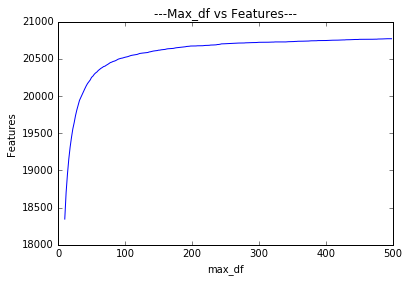

In [150]:
#lets examine how max_df affect the number of featuers.
# as the paramter accept percentage and absoulte value, we will try the aboulate, we don't expect any change
# in the trend if we using the absoulte or percentage though.
x_range=np.arange(10,500,2)

values=[TfidfVectorizer(max_df=i).fit(dataset.data[:500]).idf_.shape[0] for i in x_range]

plt.plot(x_range,values)
plt.title('---Max_df vs Features---')
plt.ylabel('Features')
plt.xlabel('max_df')
plt.show()

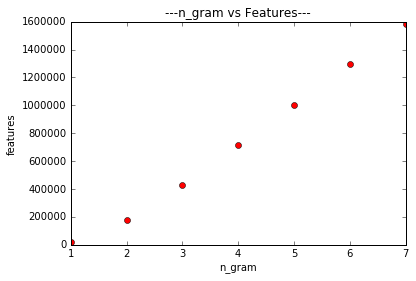

In [154]:
#Explore how the ngram_range change the number of features; test ngrams from (1,1) to (1,7) on 500 docs.
ngram_values=[(1,1),(1,2),(1,3),(1,4),(1,5),(1,6),(1,7)]

# Calculate the number of tokens in the vocabulary
y=[TfidfVectorizer(ngram_range=i).fit(dataset.data[:500]).idf_.shape[0] for i in ngram_values]

# Plot the number of features verses the (1,ngram) range
plt.title('---n_gram vs Features---')
plt.plot([1,2,3,4,5,6,7],y,'ro')
plt.xlabel('n_gram')
plt.ylabel('features')
plt.show()

*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

** "fit" your TfidfVectorizer using docs_train
Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test **

In [3]:
min_df = 1
max_df = 0.95
ngram_range = (1, 2)

q3_docs_train, q3_docs_test, q3_y_train, q3_y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)

TfidfVect= TfidfVectorizer(min_df = min_df, max_df = max_df, ngram_range = ngram_range).fit(q3_docs_train)
Xtrain = TfidfVect.transform(q3_docs_train).toarray()
print("Xtrain:" + str(Xtrain.shape))
Xtest = TfidfVect.transform(q3_docs_test).toarray()
print("Xtest:" + str(Xtest.shape))

Xtrain:(1500, 435651)
Xtest:(500, 435651)


** LinearSVC Examination **

In [9]:
pipeline = Pipeline([
    ('clf', LinearSVC()),
])

parameters =  {'clf__C': [.01,.1,.5,1,10,100,1000],
              #tol : float, optional (default=1e-4)  
              'clf__tol':[0.00001,0.0001,0.001,0.01,1,10],
              # combination hinge,l1 && squared_hinge l1 is not supported
              # avoid adjusting loss and penalty and stick with the default values
              #'clf__loss': ['hinge','squared_hinge'],
              #'clf__penalty':['l1','l2'],
              }
            
grid_search = GridSearchCV(pipeline, parameters, n_jobs=1)
grid_search.fit(Xtrain, q3_y_train)

# print the mean and std for each candidate along with the parameter
# settings for all the candidates explored by grid search.
n_candidates = len(grid_search.cv_results_['params'])
# print top 10
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                gr
                id_search.cv_results_['std_test_score'][i]))

print("Done: " + lastRunTime)

0 params - {'clf__tol': 1e-05, 'clf__C': 0.01}; mean - 0.61; std - 0.01
1 params - {'clf__tol': 0.0001, 'clf__C': 0.01}; mean - 0.61; std - 0.01
2 params - {'clf__tol': 0.001, 'clf__C': 0.01}; mean - 0.61; std - 0.01
3 params - {'clf__tol': 0.01, 'clf__C': 0.01}; mean - 0.61; std - 0.01
4 params - {'clf__tol': 1, 'clf__C': 0.01}; mean - 0.51; std - 0.00
5 params - {'clf__tol': 10, 'clf__C': 0.01}; mean - 0.59; std - 0.13
6 params - {'clf__tol': 1e-05, 'clf__C': 0.1}; mean - 0.81; std - 0.01
7 params - {'clf__tol': 0.0001, 'clf__C': 0.1}; mean - 0.81; std - 0.01
8 params - {'clf__tol': 0.001, 'clf__C': 0.1}; mean - 0.81; std - 0.01
9 params - {'clf__tol': 0.01, 'clf__C': 0.1}; mean - 0.81; std - 0.01
10 params - {'clf__tol': 1, 'clf__C': 0.1}; mean - 0.81; std - 0.01
11 params - {'clf__tol': 10, 'clf__C': 0.1}; mean - 0.55; std - 0.06
12 params - {'clf__tol': 1e-05, 'clf__C': 0.5}; mean - 0.83; std - 0.01
13 params - {'clf__tol': 0.0001, 'clf__C': 0.5}; mean - 0.83; std - 0.01
14 params

**Classification Report**

             precision    recall  f1-score   support

        neg       0.89      0.90      0.90       245
        pos       0.90      0.89      0.90       255

avg / total       0.90      0.90      0.90       500

**Confusion Matrix**

[[221  24]
 [ 27 228]]


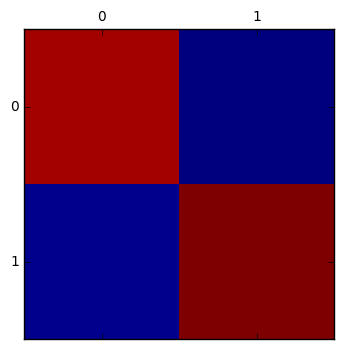

Done: 2016-11-13 20:05:45


In [24]:
y_predicted = grid_search.predict(Xtest)

# Print the classification report
print("**Classification Report**\n")
print(metrics.classification_report(q3_y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
print("**Confusion Matrix**\n")
cm = metrics.confusion_matrix(q3_y_test, y_predicted)
print(cm)

plt.matshow(cm)
plt.show()

print("Done: " + lastRunTime)

In [ ]:
** KNeighborsClassifier Examination **

0 params - {'clf__p': 1, 'clf__n_neighbors': 1}; mean - 0.50; std - 0.00
1 params - {'clf__p': 2, 'clf__n_neighbors': 1}; mean - 0.66; std - 0.01
2 params - {'clf__p': 1, 'clf__n_neighbors': 2}; mean - 0.50; std - 0.00
3 params - {'clf__p': 2, 'clf__n_neighbors': 2}; mean - 0.65; std - 0.01
4 params - {'clf__p': 1, 'clf__n_neighbors': 3}; mean - 0.51; std - 0.01
5 params - {'clf__p': 2, 'clf__n_neighbors': 3}; mean - 0.67; std - 0.00
6 params - {'clf__p': 1, 'clf__n_neighbors': 4}; mean - 0.52; std - 0.03
7 params - {'clf__p': 2, 'clf__n_neighbors': 4}; mean - 0.67; std - 0.01
8 params - {'clf__p': 1, 'clf__n_neighbors': 5}; mean - 0.50; std - 0.01
9 params - {'clf__p': 2, 'clf__n_neighbors': 5}; mean - 0.65; std - 0.02
10 params - {'clf__p': 1, 'clf__n_neighbors': 6}; mean - 0.52; std - 0.02
11 params - {'clf__p': 2, 'clf__n_neighbors': 6}; mean - 0.67; std - 0.02
12 params - {'clf__p': 1, 'clf__n_neighbors': 7}; mean - 0.52; std - 0.02
13 params - {'clf__p': 2, 'clf__n_neighbors': 7}

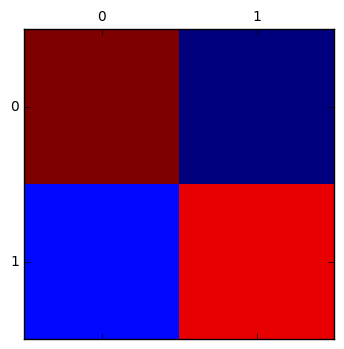

Done: 2016-11-14 09:02:53


In [4]:
pipeline = Pipeline([
    ('clf', KNeighborsClassifier())
])
# find the best n_neighbors and best distance p for minkowski(p=2 -> euclidean, p=1-> manhattan)
parameters =  {'clf__n_neighbors': [1,2,3,4,5,6,7],
              'clf__p':[1,2],
              }
            
grid_search = GridSearchCV(pipeline, parameters, n_jobs=2)
grid_search.fit(Xtrain, q3_y_train)

# print the mean and std for each candidate along with the parameter
# settings for all the candidates explored by grid search.
n_candidates = len(grid_search.cv_results_['params'])
# print top 10
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

    
    
y_predicted = grid_search.predict(Xtest)

# Print the classification report
print("**Classification Report**\n")
print(metrics.classification_report(q3_y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
print("**Confusion Matrix**\n")
cm = metrics.confusion_matrix(q3_y_test, y_predicted)
print(cm)

plt.matshow(cm)
plt.show()

print("Done: " + lastRunTime)

In [8]:
print (grid_search.best_params_)


{'clf__p': 2, 'clf__n_neighbors': 4}


The best params for KNeighborsClassifier are n_neighbors: 4 and p:2 (euclidean distance).

** The result from LinearSVC was way better than KNeighborsClassifier **
a good LinearSVC percision imply that there is a good line sperate the reviews,it could be that many instances are close to that hypothetical line from both sides, so when running the KNeighborsClassifier, instances near the line will have close nighbours from instances of the other hypothetical line side. this would cause a high error rate in KNeighborsClassifier that can't fit well to such problem

* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
* Can you conjecture on why the classifier made a mistake for this prediction?

In [24]:
# We will address this problem with the LinearSVC, C=1000 paramater and default for all others.
clf  = LinearSVC(C=1000)
clf.fit(Xtrain, q3_y_train)
y_predicted = clf.predict(Xtest)

# lets print the target array so we could know which index refer to positive or negative.
print("0:" + dataset.target_names[0] + " 1: " + dataset.target_names[1])

print("**Classification Report**\n")
print(metrics.classification_report(q3_y_test, y_predicted,
                                    target_names=dataset.target_names))

print("Done: " + lastRunTime)

0:neg 1: pos
**Classification Report**

             precision    recall  f1-score   support

        neg       0.89      0.83      0.86       265
        pos       0.82      0.89      0.85       235

avg / total       0.86      0.86      0.86       500

Done: 2016-11-15 14:29:15


** find false positive **

In [40]:
# to find false positive we need to look on 1 in y_predicted that cooresponst to 0 in the q3_y_test
for i in range(len(y_predicted)): 
    if (y_predicted[i] == 1 and q3_y_test[i]==0):
        false_positive_idx = i
        break     
print('** false positive example: ',false_positive_idx)         
print(q3_docs_test[false_positive_idx])


** false positive example:  1
b'i read the new yorker magazine and i enjoy some of their really in-depth articles about some incident . \nthey will take some incident like the investigation of a mysterious plane crash and tell you what happened in detail . \nit becomes a real education in what agencies get involved and how theories are suggested , and what kind of pressure the investigators are under , and just about any other aspect you can think of . \nfrequently i get the feeling that the article sounded exciting , but i am being told in more detail than i really wanted to know . \noften i get to the middle of a story and say , ok , it sounded good but i now have invested more time than i am willing to spend on this subject . \nfilm is a different medium . \nit is a visual medium . \nthat slows down the telling of stories much more than people realize . \ni frequently am surprised to find out how short a film script is and how much of the pages are empty space . \nthe magazine artic

###

we could conjecture that the model falsely classify this review as positive because it includes some positive structures. even the 1st sentence appears very positive

** i read the new yorker magazine and i enjoy some of their really in-depth articles about some incident**
** frequently i get the feeling that the article sounded exciting **
** for even so good an actor as plummer to play him convincingly**
** have been enthralling **

We run with (1,2) n grams, so maybe positive terms of two words like "so good", "i enjoy", "sounded exciting" and single words "exciting","enthralling","good" that could be more frequent in true positive reviews rather than the negative ones contribute to that the model finds it similar to positive reviews rather than negative.




**find false negative **

In [41]:
# to find false negative we need to look on 0 in y_predicted that cooresponst to 1 in the q3_y_test
for i in range(len(y_predicted)): 
    if (y_predicted[i] == 0 and q3_y_test[i]==1):
        false_negative_idx = i
        break
print('** false negative example: ', false_negative_idx)     
print(q3_docs_test[false_negative_idx])

** false negative example:  22
b'harmless , silly and fun comedy about dim-witted wrestling fans gordie and sean ( david arquette and scott caan ) who idolize current world championship wrestling heavyweight champion jimmy king ( oliver platt ) . \nwhen king is screwed out of his title by a corrupt promoter ( joe pantoliano ) , gordie and sean take it upon themselves to find their fallen hero and restore his glory . \nmy biggest fear about ready to rumble was dispatched early on , as the filmmakers are quick to show that wresting is indeed choreographed ( but not fake , mind you ) . \nthe hook of the movie is that gordie and sean are just too stupid to realize that . \narquette and caan are suitably over the top with their performances , which is exactly what a movie like this requires , and oliver platt ( one of my favorite actors ) is a riot as the drunken washed-up ex-champion . \nmany have scoffed at the idea that platt should be playing a heavyweight champion wrestler with an unbe

### 
we could conjecture that the model falsely classify this review as negative because it includes good amount of 1,2 grams of negative terms like "silly", "corrupt promoter" , "screwed out","too stupid","complaint ","silly factor"

These terms may be more frequent in true negative reviews rather than the positive ones so they contribute to that the model finds it similar to negative reviews rather than positive.



*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

In [106]:
# we want to got more representive words (reduce features) as we later want to end up with only 2. 
min_df = 10
max_df = 0.5
ngram_range = (1, 2)
Xdata = TfidfVectorizer(min_df = min_df, max_df = max_df, ngram_range = ngram_range).fit_transform(dataset.data)
Xdata.shape

(2000, 21886)

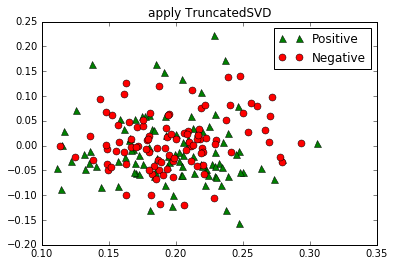

In [110]:
# the first intuitve try will be run the PCA on the featuers we got! but as PCA in python doesn't support sparse data
# we try thr equivalent TruncatedSVD
from sklearn import preprocessing
from sklearn.decomposition import TruncatedSVD

Xdata_new = TruncatedSVD(n_components=2).fit_transform(Xdata)
Xpos = Xdata_new[dataset.target==1][:100]
Xneg = Xdata_new[dataset.target==0][:100]
plt.plot(Xpos[:,0],Xpos[:,1], '^', markersize=7, color='green', label='Positive')
plt.plot(Xneg[:,0],Xneg[:,1], 'o', markersize=7, color='red', label='Negative')
plt.legend()
plt.title('apply TruncatedSVD')
plt.show()

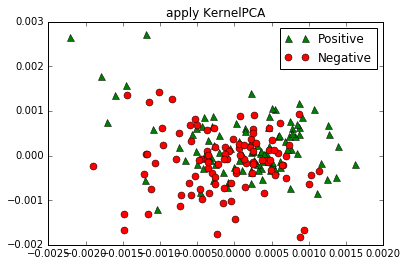

In [108]:
# As the question asked for any speration and not necessarily linear one, we could give a try to KernelPCA with poly. 

Xdata_new = KernelPCA (n_components=2,kernel='poly').fit_transform(Xdata[:].toarray())

Xpos = Xdata_new[dataset.target==1][:100]
Xneg = Xdata_new[dataset.target==0][:100]
plt.plot(Xpos[:,0],Xpos[:,1], '^', markersize=7, color='green', label='Positive')
plt.plot(Xneg[:,0],Xneg[:,1], 'o', markersize=7, color='red', label='Negative')
plt.legend()
plt.title('apply KernelPCA')
plt.show()

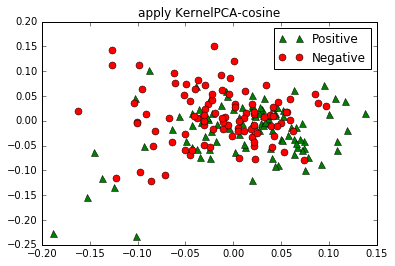

In [113]:
#KernelPCA with poly doen't give a good seperation, let give it another try with cosine

Xdata_new = KernelPCA (n_components=2,kernel='cosine').fit_transform(Xdata[:].toarray())

Xpos = Xdata_new[dataset.target==1][:100]
Xneg = Xdata_new[dataset.target==0][:100]
plt.plot(Xpos[:,0],Xpos[:,1], '^', markersize=7, color='green', label='Positive')
plt.plot(Xneg[:,0],Xneg[:,1], 'o', markersize=7, color='red', label='Negative')
plt.legend()
plt.title('apply KernelPCA-cosine')
plt.show()

using dimensions reduction doesn't give good result to separate postive and negative in 2 dimensions.
we will try another apporach of defing other features.


1- length (negative usually longer)


2- number of questions mark(we notice that negative reviews has a lot of  rhetorical questions if the last 90 chars.


3- diff between the ratio of negative words and positive words in the last 90 chars.

In [31]:
data_set = dataset.data
rev_length = [len(data) for data in data_set]
rev_questions_mark = [str(data)[:90].count("?")*100 for data in data_set]

positive_pattern = '(?<!not) good| (?<!not) interesting| (?<!not) nice| (?<!not) awesome| (?<!not) excellent| (?<!not) appealing| (?<!not) fascinating| (?<!not) remarkable| (?<!not) first-rate| (?<!not) insightful| (?<!not) clever| (?<!not) charming| (?<!not) comical| (?<!not) charismatic| (?<!not) enjoyable| (?<!not) uproarious| (?<!not) original| (?<!not) tender| (?<!not) hilarious| (?<!not) absorbing| (?<!not) sensitive| (?<!not) riveting| (?<!not) intriguing| (?<!not) powerful| (?<!not) enjoyable| (?<!not) pleasant| (?<!not) surprising| (?<!not) dazzling| (?<!not) thought provoking| (?<!not) imaginative| (?<!not) legendary'
rev_positive_ratio = [len(re.findall(positive_pattern, str(data)[:90],re.IGNORECASE))*10000 for data in data_set]

negative_patterns = '(?<!not) bad| (?<!not) awful| (?<!not) unimpressive| (?<!not) horrible| (?<!not) unpleasant | (?<!not) second-rate| (?<!not) violent| (?<!not) moronic| (?<!not) third-rate| (?<!not) flawed| (?<!not) juvenile| (?<!not) boring| (?<!not) distasteful| (?<!not) ordinary| (?<!not) disgusting| (?<!not) senseless| (?<!not) static| (?<!not) brutal| (?<!not) confused| (?<!not) disappointing| (?<!not) bloody| (?<!not) silly| (?<!not) tired| (?<!not) predictable| (?<!not) stupid| (?<!not) uninteresting| (?<!not) weak| (?<!not) incredibly tiresome| (?<!not) uneven| (?<!not) outdated| (?<!not) dreadful'
rev_negative_ratio= [len(re.findall(negative_patterns, str(data)[:90],re.IGNORECASE))*10000 for data in data_set]

ratio_diff = [x - y for x, y in zip(rev_positive_ratio, rev_negative_ratio)]

In [32]:
features = {'Length': rev_length,'Total Question marks': rev_questions_mark,'positive ngative words ratio diff': ratio_diff}
df = pd.DataFrame(features)

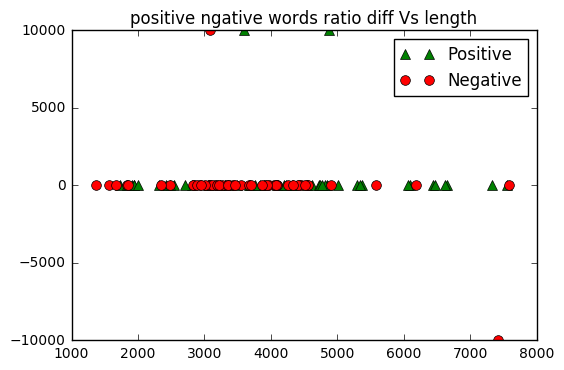

In [35]:

Xpos = df[dataset.target==1][:50]
Xneg = df[dataset.target==0][:50]
plt.plot(Xpos['Length'],Xpos['positive ngative words ratio diff'].values, '^', markersize=7, color='green', label='Positive')
plt.plot(Xneg['Length'],Xneg['positive ngative words ratio diff'].values, 'o', markersize=7, color='red', label='Negative')
plt.legend()
plt.title('positive ngative words ratio diff in last sentence Vs length')
plt.show()

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

   (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu and wliu3@wpi.edu with the subject: "[DS501] Case study 3-TEAM NUMBER ???".